### Computer Vision CSCI-GA.2271-001
### Assignment 0
### Due Date: Thursday September 12th 2019
### Date: September 9, 2019
### Name: Sree Gowri Addepalli
### Net ID: sga297

In [0]:
# Loading required libraries.
import torch   
import pandas as pd
import numpy as np
import os

In [45]:
# reference for library version number.
!pip freeze

absl-py==0.8.0
alabaster==0.7.12
albumentations==0.1.12
altair==3.2.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.224
botocore==1.12.224
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cupy-cuda100==5.4.0
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.2
Cython==0.29.13
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.5
dlib==19.16.0
dm-sonnet==1.35
docopt==0.6.2
docutils==0.15.2
dopamine-rl==1.0.5
easydict==1.9
ecos

In [0]:
# Question: Whitening Data:

# Pre-processing is an important part of computer vision and machine learning algorithms. One common approach is known as whitening in which the data is transformed 
# so that it has zero mean and is decorrelated.

# Part A) Load up the 2D dataset from the file assign0 data.py (file assumed in the same directory as the ipython nb.)
def loadFile(filePath):
    twoD_data = torch.load(filePath)
    print(twoD_data)
    print(twoD_data.shape)
    return twoD_data

In [17]:
filePath = "assign0_data.py"
twoD_data = loadFile(filePath)

tensor([[ 2.0481, -2.4186],
        [ 2.3295, -2.3656],
        [ 2.1563, -2.2842],
        ...,
        [ 2.1631, -2.3214],
        [ 2.2425, -2.0835],
        [ 2.3117, -2.2227]])
torch.Size([629, 2])


In [0]:
# Part B) Visualize it by making a 2D scatter plot (e.g. using matplotlib)
import seaborn as sns
def visScatterPlot(twoD_data, color):
    sns.regplot(x=twoD_data[:,0].numpy(), y= twoD_data[:,1].numpy(), fit_reg=False, scatter_kws={"color": color})

	 Scatter plot of loaded Data



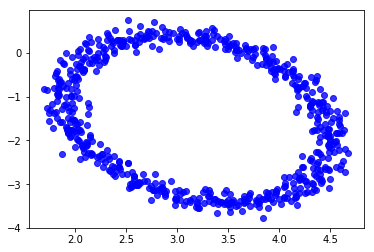

In [19]:
print("\t Scatter plot of loaded Data\n")
visScatterPlot(twoD_data, "Blue")

In [0]:
# Part C) Translates the data so that it has zero mean (i.e. is centered at the origin).

# Reference: http://agnesmustar.com/2017/11/01/principal-component-analysis-pca-implemented-pytorch/
def getZeroCentredData(twoD_data):
    twoD_data_mean = torch.mean(twoD_data,0)
    twoD_data_new = twoD_data - twoD_data_mean.expand_as(twoD_data)
    print(twoD_data_new)
    return twoD_data_new

In [21]:
twoD_data_zero_mean = getZeroCentredData(twoD_data)

tensor([[-1.1519, -0.9170],
        [-0.8705, -0.8641],
        [-1.0437, -0.7826],
        ...,
        [-1.0369, -0.8198],
        [-0.9575, -0.5820],
        [-0.8883, -0.7211]])


	Scatter plot of zero centered Data



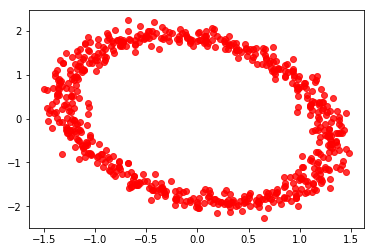

In [22]:
import seaborn as sns
print("\tScatter plot of zero centered Data\n")
visScatterPlot(twoD_data_zero_mean, "Red")

In [0]:
# Part D) Decorrelates the data so that the data covariance is the identity matrix.

# Reference: https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
#          : http://agnesmustar.com/2017/11/01/principal-component-analysis-pca-implemented-pytorch/
#          : https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca/134283#134283

# Calculate covariance matrix-> eigen vectors of covariance matrix -> multiply eigen vectors with data.
def getDecorrelatedData(twoD_data_new):
    # get the data covariance matrix
    cov = torch.mm(twoD_data_new.t(), twoD_data_new) / twoD_data_new.size()[0]
    print("The covariant matrix\n")
    print(cov)
    print("\n")
    # perform singular value decomposition to get the eigen vectors.
    U, S, V = torch.Tensor(cov).svd()
    # Multiply the data with the eigen vector
    twoD_data_new_rot = torch.mm(twoD_data_new, U)
    #get the decorrelated data
    print("The decorrelated matrix\n")
    print(twoD_data_new_rot)
    print("\n")
    return twoD_data_new_rot, S

In [24]:
twoD_data_new_rot, S = getDecorrelatedData(twoD_data_zero_mean)

The covariant matrix

tensor([[ 0.8529, -0.2990],
        [-0.2990,  1.8368]])


The decorrelated matrix

tensor([[-0.5724, -1.3565],
        [-0.5973, -1.0713],
        [-0.4721, -1.2161],
        ...,
        [-0.5098, -1.2196],
        [-0.3022, -1.0790],
        [-0.4549, -1.0499]])




	Scatter plot of Decorrelated Data



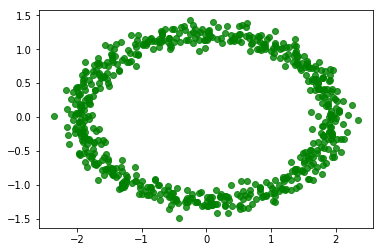

In [25]:
import seaborn as sns
print("\tScatter plot of Decorrelated Data\n")
visScatterPlot(twoD_data_new_rot, "Green")

In [0]:
def getWhitenedData(twoD_data_new_rot, S):
    # Divide each dimension by sqrt of it's eigen value (Added a small constant to avoid division by zero)
    whitenedMatrix = twoD_data_new_rot / (torch.sqrt(S + 1e-5).expand_as(twoD_data_new_rot))
    print("The whitened Matrix")
    print("\n")
    print(whitenedMatrix)
    return whitenedMatrix

In [27]:
WhitenedMatrix = getWhitenedData(twoD_data_new_rot, S)

The whitened Matrix


tensor([[-0.4130, -1.5467],
        [-0.4310, -1.2215],
        [-0.3407, -1.3865],
        ...,
        [-0.3679, -1.3905],
        [-0.2181, -1.2302],
        [-0.3282, -1.1970]])


In [28]:
#  Getting the covariance of the whitened matrix to check for an identity matrix.
cov_new_white = torch.mm(WhitenedMatrix.t(), WhitenedMatrix) / WhitenedMatrix.size()[0]
cov_new_white

tensor([[ 9.9999e-01, -1.8194e-08],
        [-1.8194e-08,  9.9999e-01]])

	Scatter plot of whitened Data



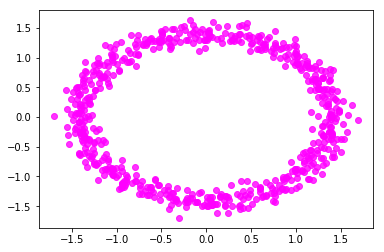

In [29]:
# Part E) Plot the whitened data.
import seaborn as sns
print("\tScatter plot of whitened Data\n")
visScatterPlot(WhitenedMatrix, "Magenta")

In [0]:
# Part F) As a comment in your code, discuss the dependencies present in the whitened data.

# The graph still has higher order dependencies like quadratic dependencies. As with the whitening procedure we remove linear dependencies or
# highly correlated data using dimensionality reduction, which tries to retain maximum variance.

In [0]:
# Question: Fitting a 1D function with a simple neural net

# In PyTorch, generate the function y = cos(x) over the interval −π ≤ x ≤ π, at discrete intervals of 0.01.
# Adapting the examples from http://pytorch.org/tutorials/beginner/pytorch_with_examples.html,
# implement a neural net that regresses this function. I.e. takes as input x and produces an estimate ˆy, where
# ky − yˆk2 is minimized. The network should have a single hidden layer with 10 units and a single tanh()
# non-linearity. Make a plot of the true function y, with the network output ˆy before and after training overlaid
# (please use different colors for each).



# Reference: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [0]:
# we need to create input data
import torch
from torch.autograd import Variable
import numpy as np

x = torch.arange(-np.pi, np.pi, 0.01)
y = torch.cos(x)


In [33]:
x.size()[0]

629

In [34]:
y.shape

torch.Size([629])

In [0]:
N = x.size()[0]
# Reshape input and output data according to the batch_size
x = Variable(x.view(x.size()[0], -1))
y = Variable(y.view(x.size()[0], -1), requires_grad=False)

In [0]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = x.size()[0], 1, 10, 1

In [0]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)

In [0]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

In [39]:
import matplotlib.pyplot as plt
plt.clf()
def visLinearPlot(x, y, label):
    plt.plot(x.data.numpy(), y.data.numpy(), label=label)


<Figure size 432x288 with 0 Axes>

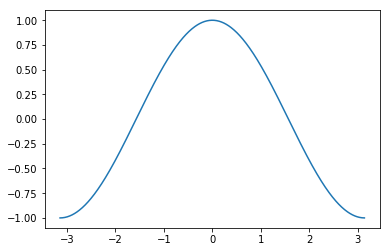

In [40]:
# The actual data
visLinearPlot(x,y, "actual")

In [41]:
learning_rate = 1e-4
initial_y_pred =0
final_y_pred =0
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)
    
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    
    if t % 50 == 0:
        print(t, loss.item())
    if t==0:
        initial_y_pred = y_pred
        #visLinearPlot(x,initial_y_pred, "initial")
        #print("Initial predicted value is: " + initial_y_pred.data.numpy())
    elif t==499:
        final_y_pred = y_pred
        #visLinearPlot(x,final_y_pred, "final")
        #print("Final predicted value is: " + final_y_pred.data.numpy())


    

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 846.4928588867188
50 54.78314208984375
100 8.576324462890625
150 4.329402923583984
200 2.6803956031799316
250 1.7462942600250244
300 1.1869863271713257
350 0.8419719338417053
400 0.6245052814483643
450 0.4850519597530365


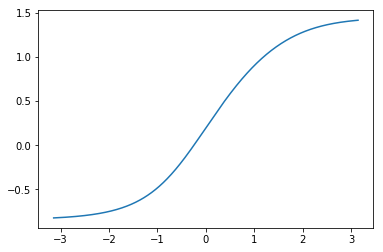

In [43]:
visLinearPlot(x,initial_y_pred, "initial")

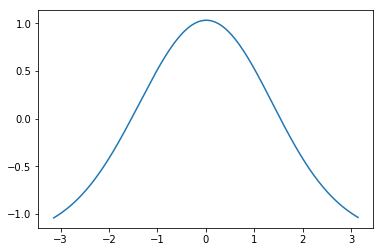

In [42]:
visLinearPlot(x,final_y_pred, "final")

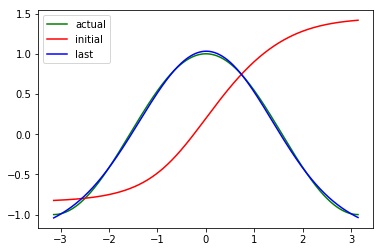

In [44]:
plt.clf()
plt.plot(x.data.numpy(), y.data.numpy(), label="actual", color = 'green')
plt.plot(x.data.numpy(), initial_y_pred.data.numpy(), label="initial", color ="red")
plt.plot(x.data.numpy(), final_y_pred.data.numpy(), label="last", color = "blue")
plt.legend()
plt.show()